## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("students-data.csv",delimiter=";")

In [14]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [146]:

df['number']= df.index
df.set_index('number',inplace=True)
print(df.head())
df.info()

       school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
number                                                                          
0          GP   F   18       U     GT3       A     4     4  at_home   teacher   
1          GP   F   17       U     GT3       T     1     1  at_home     other   
2          GP   F   15       U     LE3       T     1     1  at_home     other   
3          GP   F   15       U     GT3       T     4     2   health  services   
4          GP   F   16       U     GT3       T     3     3    other     other   

        ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
number  ...                                                                 
0       ...      4        3      4     1     1      3        6   5   6   6  
1       ...      5        3      3     1     1      3        4   5   5   6  
2       ...      4        3      2     2     3      3       10   7   8  10  
3       ...      3        2      2     1     1 

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [133]:
#df.dtypes
df_nonNumerical = df.select_dtypes(include=object)
df_nonNumerical.head()


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [134]:
df_numerical= df.select_dtypes(exclude=object)
print("before dropping variance",df_numerical.columns)

df_numerical= df_numerical.loc[:, df_numerical.var() > 1]
print("After dropping variance",df_numerical.columns)

before dropping variance Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')
After dropping variance Index(['age', 'Medu', 'Fedu', 'goout', 'Walc', 'health', 'absences', 'G1',
       'G2', 'G3'],
      dtype='object')


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [264]:
from sklearn import preprocessing 

#print(df2.head())
for col in df_nonNumerical.columns:
    label_encoder = preprocessing.LabelEncoder() 
    df3 = label_encoder.fit_transform(df_nonNumerical[col])
    df_nonNumerical[col] = df3

final_df = df_nonNumerical.join(df_numerical)

final_df.head()

C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,5,6,6
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,5,5,6
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,7,8,10
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,15,14,15
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [265]:
final_df['G1'].values[final_df['G1'].values <10] = 0

final_df['G2'].values[final_df['G2'].values < 10] = 0

final_df['G3'].values[final_df['G3'].values <10] = 0
final_df['G3'].values[final_df['G3'].values >= 10] = 1
final_df['G2'].values[final_df['G2'].values >= 10] = 1
final_df['G1'].values[final_df['G1'].values >= 10] = 1
final_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,0,0,0
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,0,0,0
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,0,0,1
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,1,1,1
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,0,1,1


In [178]:




final_df.head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,age,Medu,Fedu,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,1,0,0,0,4,0,1,1,...,18,4,4,4,1,3,6,0,0,0
1,0,0,1,0,1,0,2,0,0,0,...,17,1,1,3,1,3,4,0,0,0
2,0,0,1,1,1,0,2,2,1,1,...,15,1,1,2,3,3,10,0,0,1
3,0,0,1,0,1,1,3,1,1,0,...,15,4,2,2,1,5,2,1,14,1
4,0,0,1,0,1,2,2,1,0,0,...,16,3,3,2,2,5,4,0,10,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [266]:
X = final_df.drop('G3', axis=1)
y= final_df['G3']


## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

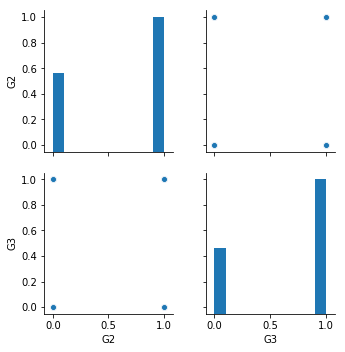

In [256]:
import seaborn as sns
sns.pairplot(data=final_df[['G2','G3']])
#from the graph we can see that G2 anf G3 are dependent variable.G2 can be a good predictor for G3.


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

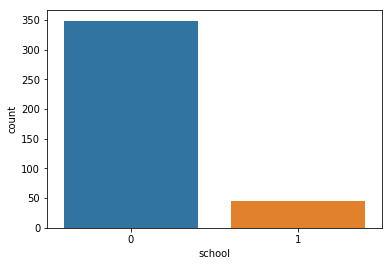

In [187]:

sns.countplot(x="school",data=final_df)

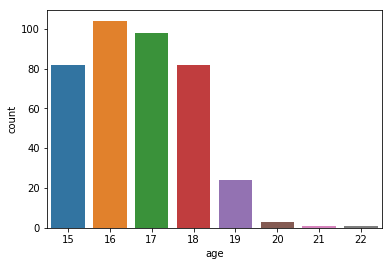

In [189]:
sns.countplot(x="age",data=final_df)

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [208]:

test_size = X.count()-300
#print("test_size",test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=300, random_state=1)
print("Train Records",X_train.count())
print("Test records",X_test.count())

Train Records school        300
sex           300
address       300
famsize       300
Pstatus       300
Mjob          300
Fjob          300
reason        300
guardian      300
schoolsup     300
famsup        300
paid          300
activities    300
nursery       300
higher        300
internet      300
romantic      300
age           300
Medu          300
Fedu          300
goout         300
Walc          300
health        300
absences      300
G1            300
G2            300
dtype: int64
Test records school        95
sex           95
address       95
famsize       95
Pstatus       95
Mjob          95
Fjob          95
reason        95
guardian      95
schoolsup     95
famsup        95
paid          95
activities    95
nursery       95
higher        95
internet      95
romantic      95
age           95
Medu          95
Fedu          95
goout         95
Walc          95
health        95
absences      95
G1            95
G2            95
dtype: int64


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [219]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import f1_score,classification_report

model = LogisticRegression(penalty='none',solver='lbfgs')
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print("F1Score-Train",f1_score(y_train,y_train))
print("F1Score-Test",f1_score(y_test,y_predict))
print("Model Score",model_score)
print(metrics.confusion_matrix(y_test, y_predict))
print("classification report",classification_report(y_test,y_predict))

F1Score-Train 1.0
F1Score-Test 0.9160305343511451
Model Score 0.8842105263157894
[[24  4]
 [ 7 60]]
classification report               precision    recall  f1-score   support

           0       0.77      0.86      0.81        28
           1       0.94      0.90      0.92        67

    accuracy                           0.88        95
   macro avg       0.86      0.88      0.86        95
weighted avg       0.89      0.88      0.89        95



C:\Users\brao.PW\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


# Naive bayes with Iris data

### Import Iris.csv

In [220]:
iris=pd.read_csv("Iris.csv")

In [221]:
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [271]:
x= iris.drop('Class',axis=1)
y= iris['Class']

### Find the distribution of target variable (Class)

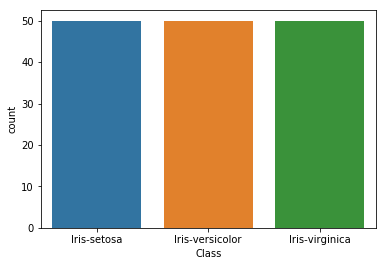

In [272]:
sns.countplot(y)

### Plot the distribution of target variable using histogram

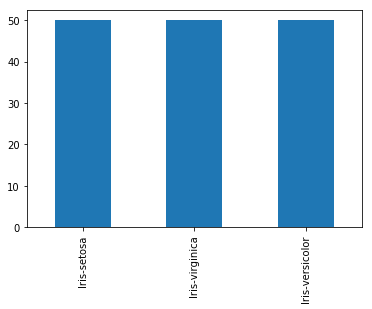

In [231]:
pd.value_counts(iris["Class"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

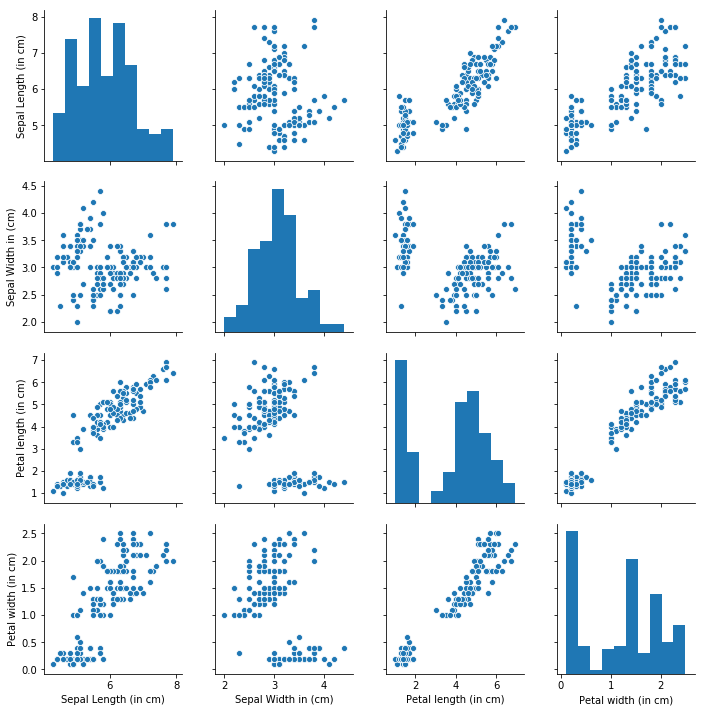

In [232]:
sns.pairplot(iris)

### Summary Statistics and explain insights for at least 2 variables

In [236]:
iris.describe()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Correlation among all variables and give your insights

In [237]:
iris.corr()
#from the below table we can see that Sepal Length and Petal Length are highly correlated
#Also Petal Width and Petal Length are higjly correlated

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm)
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000


### Split data in Training and Validation in 80:20

In [251]:

X_train, X_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=1)

### Do Feature Scaling

In [252]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
iris_scaled = preprocessing.scale(x)

### Train and Fit NaiveBayes Model

In [253]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Print Accuracy and Confusion Matrix and Conclude your findings

In [260]:
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
